In [2]:
# Dependencies and Setup
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import plotly.graph_objects as go


In [3]:
# Set file path for data 
csv_path = "CleanDataset/clean_data.csv"

# Read the data 
clean_data = pd.read_csv(csv_path)

# Display the data table for preview
clean_data.head()


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2019-03-01 04:17:00,3,0,10,10,9,10,7,3,2,...,8,0,2,1,6,3,10,Less than 20,Female,699.1
1,2019-03-02 22:26:00,2,3,7,7,1,5,4,0,2,...,7,4,0,2,10,1,4,51 or more,Female,636.3
2,2019-03-03 03:06:00,5,2,5,3,4,3,4,0,1,...,3,0,3,2,5,5,10,36 to 50,Female,676.5
3,2019-03-03 12:20:00,1,5,6,5,10,4,2,4,1,...,6,6,2,1,6,1,7,36 to 50,Female,631.4
4,2019-03-04 00:48:00,2,4,10,3,3,1,1,4,1,...,9,10,2,1,1,1,5,21 to 35,Female,600.8


In [4]:
# Create new dataframe to only include the desired columns
meditation_df = clean_data[["Timestamp", "WEEKLY_MEDITATION", "AGE", "GENDER", "WORK_LIFE_BALANCE_SCORE"]]

# Rename column(s) for readability
meditation_df = meditation_df.rename(columns={"WEEKLY_MEDITATION": "# Weekly Meditations", 
                                        "AGE": "Age", 
                                        "GENDER": "Gender", 
                                        "WORK_LIFE_BALANCE_SCORE": "Work-Life Balance Score"})

# Display
meditation_df


,Timestamp,# Weekly Meditations,Age,Gender,Work-Life Balance Score
0,2019-03-01 04:17:00,10,Less than 20,Female,699.1
1,2019-03-02 22:26:00,4,51 or more,Female,636.3
2,2019-03-03 03:06:00,10,36 to 50,Female,676.5
3,2019-03-03 12:20:00,7,36 to 50,Female,631.4
4,2019-03-04 00:48:00,5,21 to 35,Female,600.8
...,...,...,...,...,...
5543,2021-03-14 05:42:00,5,51 or more,Female,644.5
5544,2021-03-14 06:30:00,8,21 to 35,Female,714.9
5545,2021-03-14 08:35:00,10,21 to 35,Male,716.6
5546,2021-03-14 08:43:00,8,21 to 35,Female,682.0


In [5]:
#Average Work-Life Balance Score for # of Weekly Meditations
#Generate a line plot showing the average work-life balance score per # of Weekly Meditations

# Group by # of weekly meditations
grouped = meditation_df.groupby(["# Weekly Meditations"])

# Get average score for each # of people supported
avg_score = grouped["Work-Life Balance Score"].mean()

# Create new dataframe
MedScore_summary = pd.DataFrame({"Average Score": avg_score})
MedScore_summary["Average Score"] = MedScore_summary["Average Score"].astype(int)

# Display
MedScore_summary
   

,Average Score
# Weekly Meditations,
0,608
1,623
2,640
3,646
4,655
5,661
6,670
7,674
8,681


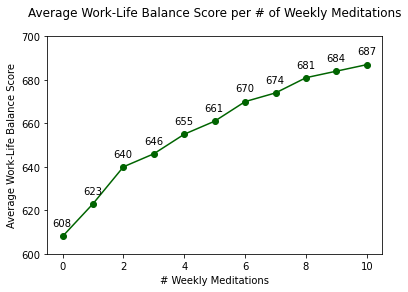

In [14]:
# Create line plot
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(MedScore_summary, "darkgreen", marker="o")

# Add labels. pad=20 makes a space between title and plot
plt.title(f"Average Work-Life Balance Score per # of Weekly Meditations", pad=20)

plt.xlabel("# Weekly Meditations")
plt.ylabel("Average Work-Life Balance Score")
plt.ylim (600, 700)

scores = MedScore_summary["Average Score"].tolist()

# Annotate markers
for i, v in enumerate(scores):
    ax.annotate(str(v), xy=(i,v), xytext=(-10,10), textcoords='offset points')

# Save the figure
plt.savefig("meditation_fig1.png")

# Display
plt.show()
   


In [15]:
#Breakdown of work-life-balance score when they meditated 10 times per week.
#The highest average work-life balance score came from individuals who meditated 10 times weekly.
#Create a box plot showing the scores distribution per age-group


Times10 = meditation_df[meditation_df["# Weekly Meditations"] == 10]

#Display
Times10


,Timestamp,# Weekly Meditations,Age,Gender,Work-Life Balance Score
0,2019-03-01 04:17:00,10,Less than 20,Female,699.1
2,2019-03-03 03:06:00,10,36 to 50,Female,676.5
7,2019-03-04 01:30:00,10,Less than 20,Male,648.0
16,2019-03-06 19:46:00,10,51 or more,Female,687.7
22,2019-03-09 10:05:00,10,51 or more,Female,666.2
...,...,...,...,...,...
5528,2021-03-12 17:52:00,10,36 to 50,Female,746.7
5531,2021-03-13 04:18:00,10,21 to 35,Female,693.7
5538,2021-03-13 11:33:00,10,51 or more,Male,688.7
5540,2021-03-13 19:15:00,10,51 or more,Male,689.0


In [25]:
#Create a list of age groups
AgeGroup = ["Less than 20", "21 to 35", "36 to 50", "51 or more"]

WLScore = []

# Locate rows for each age group and get the work-life balance scores
for age in AgeGroup:
    
    age_group = Times10.loc[Times10["Age"] == age]
    score = age_group["Work-Life Balance Score"]
    
    # Add values to list
    WLScore.append(score)
    
    # Calculate the IQR and quantitatively 
    quartiles = score.quantile([.25,.5,.75])
    lowerq    = quartiles[0.25]
    upperq    = quartiles[0.75]
    iqr       = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Check for outliers
    outliers = score.loc[(score < lower_bound) | (score > upper_bound)]
    
    # Print results
    print(f"\n{age}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outlier Count: {outliers.count()}")
    
    # Print the outlier value if it exists
    if outliers.count() > 0:
        for x in outliers.index:
            print(f"Work-Life Balance Score Outlier Value: {outliers[x]}")
    




Less than 20
Lower Quartile: 648.35
Upper Quartile: 705.4499999999999
IQR: 57.09999999999991
Lower Bound: 562.7000000000002
Upper Bound: 791.0999999999998
Outlier Count: 0

21 to 35
Lower Quartile: 655.35
Upper Quartile: 711.3499999999999
IQR: 55.999999999999886
Lower Bound: 571.3500000000001
Upper Bound: 795.3499999999997
Outlier Count: 3
Work-Life Balance Score Outlier Value: 571.1
Work-Life Balance Score Outlier Value: 563.6
Work-Life Balance Score Outlier Value: 567.7

36 to 50
Lower Quartile: 655.0
Upper Quartile: 717.8
IQR: 62.799999999999955
Lower Bound: 560.8000000000001
Upper Bound: 811.9999999999999
Outlier Count: 3
Work-Life Balance Score Outlier Value: 556.2
Work-Life Balance Score Outlier Value: 557.5
Work-Life Balance Score Outlier Value: 549.4

51 or more
Lower Quartile: 672.0999999999999
Upper Quartile: 725.8
IQR: 53.700000000000045
Lower Bound: 591.5499999999998
Upper Bound: 806.35
Outlier Count: 2
Work-Life Balance Score Outlier Value: 531.6
Work-Life Balance Score O

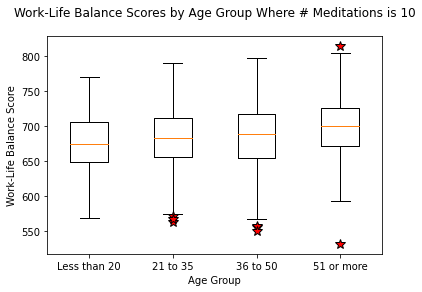

In [24]:
# Generate a box plot of the work-life balance scores across the different AgeGroups
fig1, age_plot = plt.subplots()
age_plot.boxplot(WLScore, labels=AgeGroup, flierprops={'markerfacecolor': 'r', 'markersize':10,'marker': '*'})

# Set labels
age_plot.set_title("Work-Life Balance Scores by Age Group Where # Meditations is 10", pad=20)
age_plot.set_xlabel("Age Group")
age_plot.set_ylabel("Work-Life Balance Score")

# Save the plot
plt.savefig("meditation_fig2.png")

# Display
plt.show()